<a href="https://colab.research.google.com/github/nehal35/EDA-Hotel-booking-analysis/blob/main/hotel_booking_analysis_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

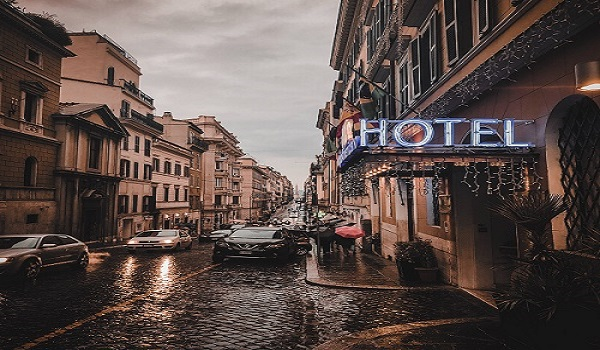

# **Importing Essential Libraries**

In [5]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import folium
import plotly.express as px

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
hotel_df=pd.read_csv("/content/drive/MyDrive/hotel booking csv/Copy of Hotel Bookings.csv")

In [9]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


We see that there are 32 columns in the dataframe and some columns like 'children', 'company', 'country' and 'agent' have null value

In [12]:
# creating a copy of dataframe
df1=hotel_df.copy()

First of all we will try to understand the meaning of all columns of the dataframe.
For this we will see the unique values attained by each column whose meaning we are unable to understand.

In [13]:
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [14]:
df1['is_canceled'].unique()

array([0, 1])

In [15]:
df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [16]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [18]:
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [20]:
df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [21]:
df1['children'].unique()    # This column has 0 as well as null values

array([ 0.,  1.,  2., 10.,  3., nan])

# **Cleaning data**

cleaning dat is crucial step before eda as it will remove the ambigous data that can affect the outcome of EDA 

# While cleaning data we will perform following steps:
1.remove duplicte rows\
2.handling missing value.\
3.convert column to appropriate  datatypes.\
4.Adding important columns


# **Step 1: Removing duplicate rows if any**

In [22]:
df1[df1.duplicated()].shape  #show no.of rows of duplicate rows

(31994, 32)

In [23]:
# dropping duplicate values
df1.drop_duplicates(inplace=True)

In [24]:
df1.shape

(87396, 32)

# **Step2: Handling missing values.**

In [25]:
# columns having missing values 
df1.isnull().sum().sort_values(ascending=False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns.
We will replace null values by 0 in these columns

In [26]:
df1[['company','agent']]=df1[['company','agent']].fillna(0)

In [27]:
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction.
So, 'nan' values are the missing values due to error of recording data.

We will replace the null values under this column with mean value of children

In [28]:
df1['children'].fillna(df1['children'].mean(), inplace = True)

Next column with missing value is 'country'. This column represents the country of oriigin of customer.
Since, this column has datatype of string. We will replace the missing value with the mode of 'country' column.

In [29]:
df1['country'].fillna('others', inplace = True)

In [30]:
# Checking if all null values are removed
df1.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [31]:
df1[df1['adults']+df1['babies']+df1['children'] == 0].shape

(166, 32)

In [32]:
df1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace = True)

# Step 3: Converting columns to appropriate datatypes.

In [33]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df1[['children', 'company', 'agent']] = df1[['children', 'company', 'agent']].astype('int64')

In [34]:
# changing datatype of column 'reservation_status_date' to data_type.
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')

# Step 4: Adding important columns.

In [35]:
# Adding total staying days in hotels
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

We are adding this column so that we can analyse the stay length at hotels.

EDA
Lets first find the correlation between the numerical data.
\

Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type. So we wont need to check them for correlation.
\

Also, we have added total_stay and total_people columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

In [36]:
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


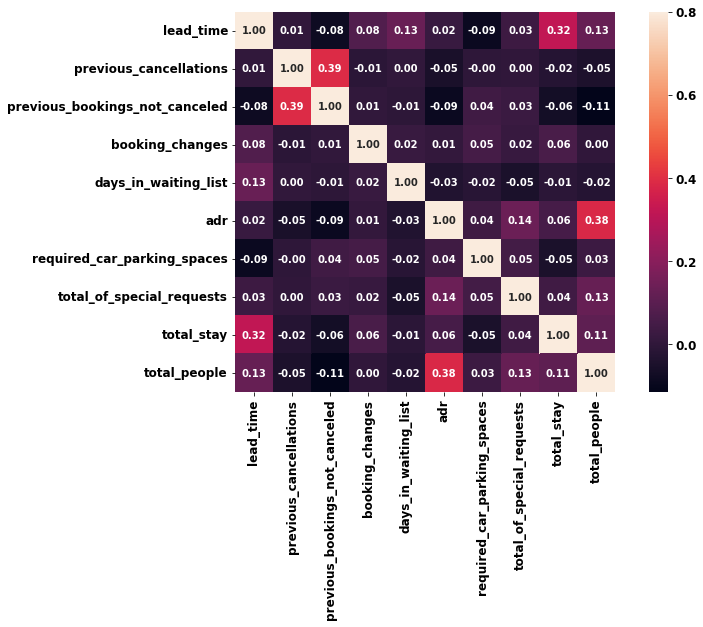

In [37]:
#correlation matrix
corrmat = num_df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

### 1)Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

### 2)adr(average daily rate) is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

### Lets see does length of stay affects the adr.

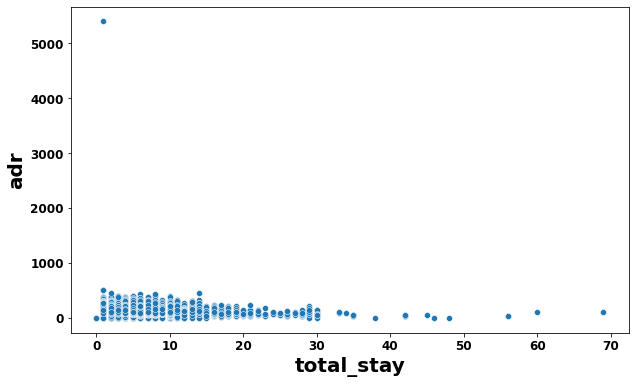

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='adr',x='total_stay',data=df1)
plt.show()

we notice that there is an outlier in adr ,so we will remove that for better scatter plot

In [39]:
df1.drop(df1[df1['adr']>5000].index,inplace=True)

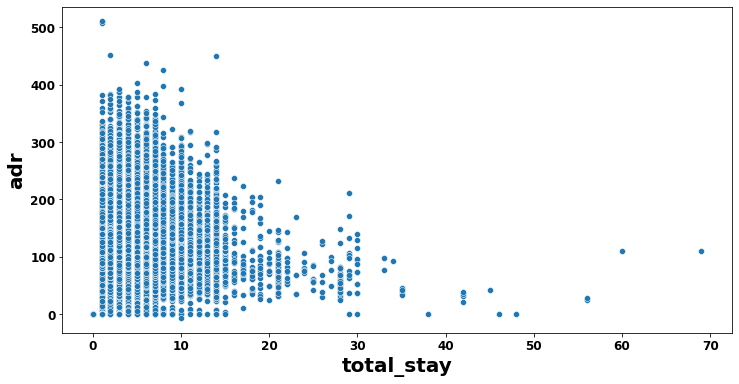

In [40]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='adr',x='total_stay',data=df1)
plt.show()


from the scatter plot we can see that as length of tota_stay increase the adr decreases. this means for longer stay, the better deal for customer can be finalised.

# **Univariate Analysis **

# Q.1) which agent makes most no of bookings?



In [41]:
# return highest booking made by agents 
d1 = pd.DataFrame(df1['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)

# as agent 0 was NAN value and we replaced it with zero and indicate no booking so droping
d1.drop(d1[d1['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent

# Selecting top 10 performing agents
d1 = d1[:10]                                                  


Text(0.5, 1.0, 'Most Booking Made By the agent')

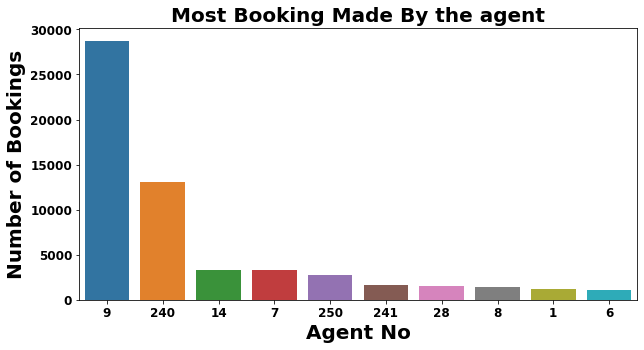

In [42]:
# visualizing the graph 
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent)
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title('Most Booking Made By the agent')

# **Observation**

### Agent no 9 made most of the bookings 

# Q.2) Which type of hotel is mostly prefered by the guests?

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

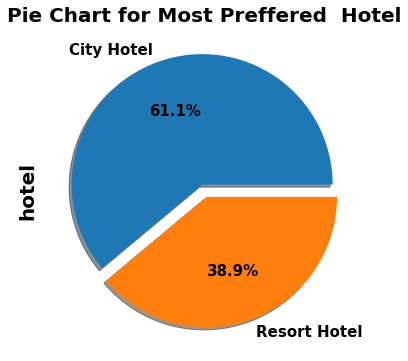

In [43]:
# Visualizsing the by pie chart.
df1['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(8,6),fontsize=15)   
plt.title('Pie Chart for Most Preffered  Hotel')

# **Observation** 

### City Hotel is most preffered hotel by guests. Thus city hotels has maximum bookings.

# Q.3)What is the pecentage of cancellation?

Text(0.5, 1.0, 'Cancellation and non Cancellation')

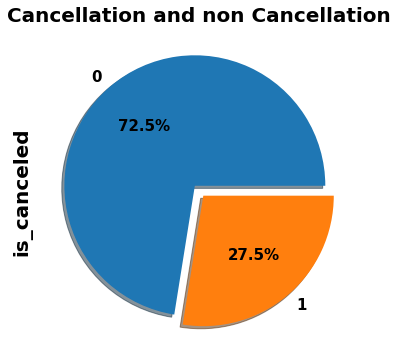

In [44]:
df1['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(8,6),fontsize=15)
plt.title("Cancellation and non Cancellation")

**Observation :**

0= not cancled\
1= canceled\
27.5 % of the bookings were cancelled.




# Q.4)What is the percentage of repeated guest?


Text(0.5, 1.0, ' Percentgae (%) of repeated guests')

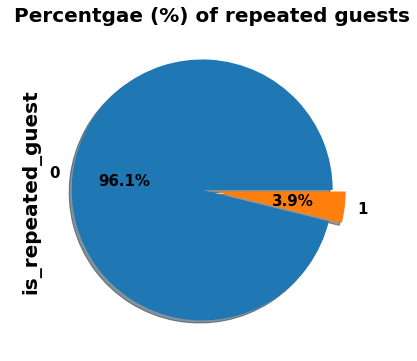

In [45]:
df1['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(8,6),fontsize=15)

plt.title(" Percentgae (%) of repeated guests")

# **Observation:**

### Repeated guest are very vew which only 3.9%

### In order to retained the guest management should take feedback from guest and try to improve  the services 

# 5) What is the percentage distribution of "Customer Type"?

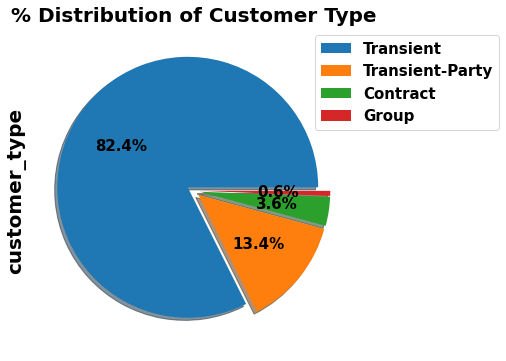

In [46]:
df1['customer_type'].value_counts().plot.pie(explode=[0.05]*4,shadow=True,autopct='%1.1f%%',figsize=(8,6),fontsize=15,labels=None)


labels=df1['customer_type'].value_counts().index.tolist()
plt.title('% Distribution of Customer Type')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

**1. Contract**

when the booking has an allotment or other type of contract associated to it

**2. Group**

when the booking is associated to a group

**3. Transient**

when the booking is not part of a group or contract, and is not associated to other transient booking

**4. Transient-party**

when the booking is transient, but is associated to at least other transient booking

# **Observation:`** 
### Transient customer type is more whcih is 82.4 %. percentage of Booking associated by the Group is vey low.

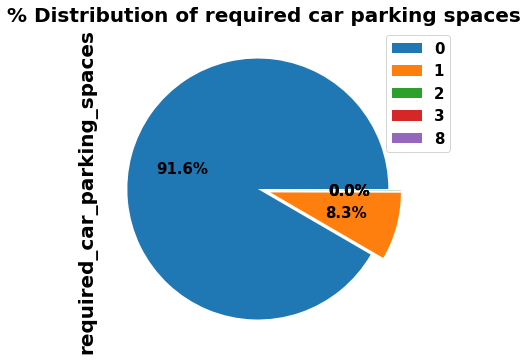

In [47]:
df1['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(8,6),fontsize=15,labels=None)
labels=df1['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

# **Observation**

### 91.6 % guests did not required the parking space. only 8.3 % guests required only 1 parking space.

# Q.7)What is the percentage of booking changes made by the customer?

Text(0, 0.5, 'Percentage(%)')

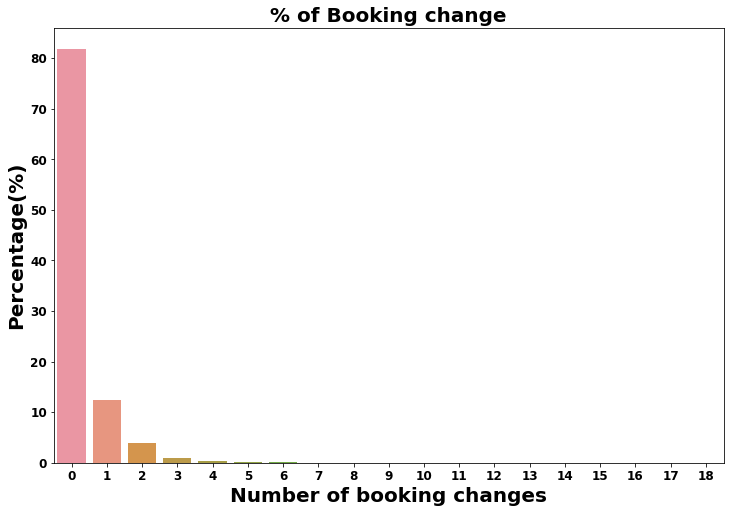

In [48]:
booking_changes_df=df1['booking_changes'].value_counts().reset_index().rename(columns={'index': "number_booking_changes",'booking_changes':'Counts'})

plt.figure(figsize=(12,8))
sns.barplot(x=booking_changes_df['number_booking_changes'],y=booking_changes_df['Counts']*100/df1.shape[0])
plt.title("% of Booking change")
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')

0= 0 changes made in the booking\
1= 1 changes made in the booking\
2= 2 changes made in the booking

# **Observation**

### Almost 82% of the bookings were not changed by guests.

# Q.8)What is percentage distribution of Deposite type ?

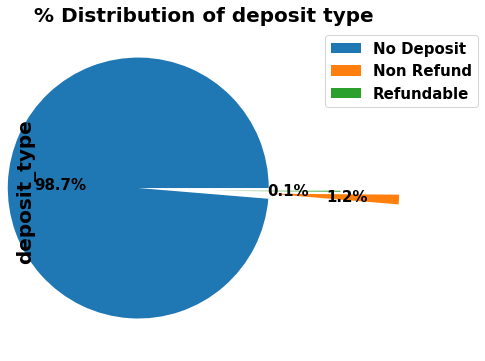

In [49]:
df1['deposit_type'].value_counts().plot.pie(explode=(0.5,0.5,0.05),autopct='%1.1f%%',shadow=False,figsize=(8,6),fontsize=15,labels=None)
plt.title("% Distribution of deposit type")
labels=df1['deposit_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

# **Observation**

### 98.7 % of the guests prefer "No deposit" type of deposit.


# Q.9) Which type of food is mostly preferred by the guests ? 

Text(0.5, 1.0, 'Preferred Meal Type')

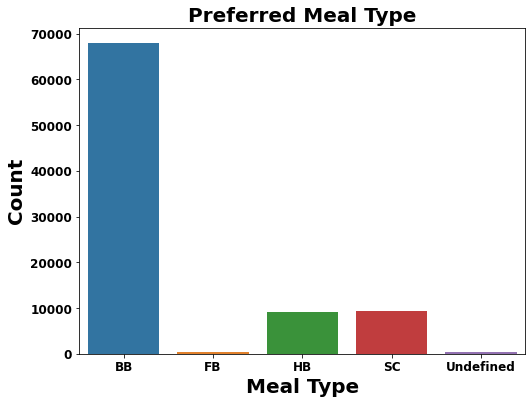

In [50]:
#df1['meal'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(20,15),fontsize=20)
plt.figure(figsize=(8,6))
sns.countplot(x=df1['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")

Types of meal in hotels:

BB - (Bed and Breakfast)\
HB- (Half Board)\
FB- (Full Board)\
SC- (Self Catering)\

# **Observation**

###  So the most preferred meal type by the guests is BB( Bed and Breakfast)
###  HB- (Half Board) and SC- (Self Catering) are equally preferred.

# Q.10) From which country the most guests are coming?

In [51]:
# Counting the guests from various countries.
country_df=df1['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]
# country_df1=df1['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})



In [52]:
country_df

,country,count of guests
0,PRT,27354
1,GBR,10424
2,FRA,8823
3,ESP,7244
4,DEU,5385
5,ITA,3061
6,IRL,3015
7,BEL,2081
8,BRA,1993
9,NLD,1910


Text(0.5, 1.0, 'Number of guest from diffrent countries')

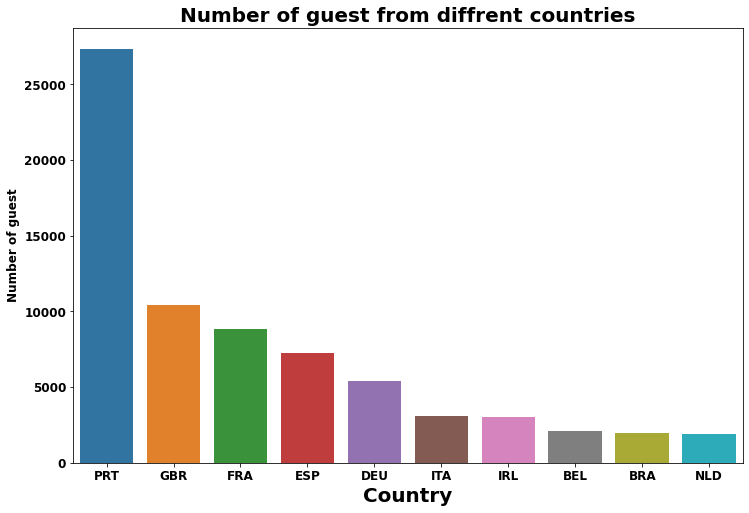

In [53]:
# Visualizing by  plotting the graph
plt.figure(figsize=(12,8))
sns.barplot(x=country_df['country'],y=country_df['count of guests'])
plt.xlabel('Country')
plt.ylabel('Number of guest',fontsize=12)
plt.title('Number of guest from diffrent countries')

In [54]:
#importing the folium library
import folium                                # searched on google 
import plotly.express as px

In [55]:
basemap = folium.Map()
guests_map = px.choropleth(country_df, locations = country_df['country'],color = country_df['count of guests'], hover_name = country_df['country'])
guests_map.show()

# **Observation**

### Most of the guests are coming from portugal i.e more 25000 guests are from portugal

abbreevations for countries-

PRT- Portugal\
GBR- United Kingdom\
FRA- France\
ESP- Spain\
DEU - Germany\
ITA -Itlay\
IRL - Ireland\
BEL -Belgium\
BRA -Brazil\
NLD-Netherlands

# **Q.11) Which is the most preferred room type by the customers?**

Text(0.5, 1.0, 'Most preferred room Type')

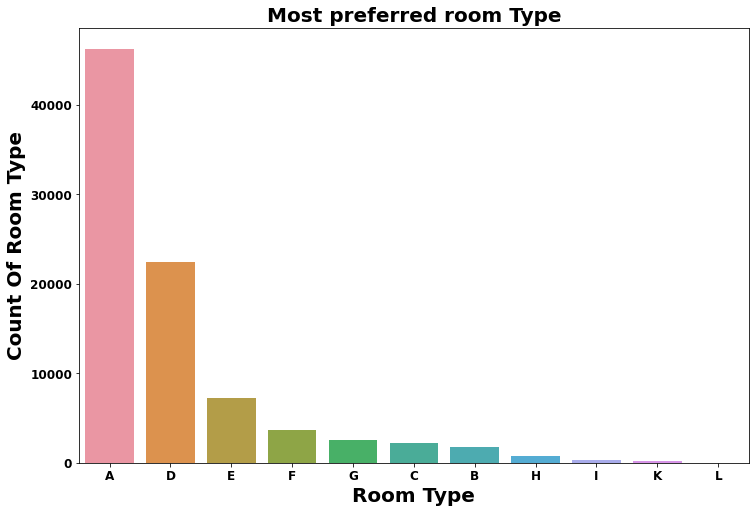

In [56]:
plt.figure(figsize=(12,8))
sns.countplot(x=df1['assigned_room_type'],order=df1['assigned_room_type'].value_counts().index)
plt.xlabel('Room Type')
plt.ylabel('Count Of Room Type')
plt.title('Most preferred room Type')

# **Observation**

### So the most preferred Room type is "A".

# **Q.12) In which month most of the bookings happened?**

In [57]:
# groupby arrival_date_month and take the hotel count
bookings_by_months_df=df1.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})


In [58]:
bookings_by_months_df

,arrival_date_month,Counts
0,April,7900
1,August,11242
2,December,5112
3,February,6083
4,January,4685
5,July,10043
6,June,7756
7,March,7488
8,May,8344
9,November,4973


In [59]:
# Create list of months in order

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [60]:
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)


In [61]:
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df

,arrival_date_month,Counts
4,January,4685
3,February,6083
7,March,7488
0,April,7900
8,May,8344
6,June,7756
5,July,10043
1,August,11242
11,September,6682
10,October,6921


Text(0, 0.5, 'Number of bookings')

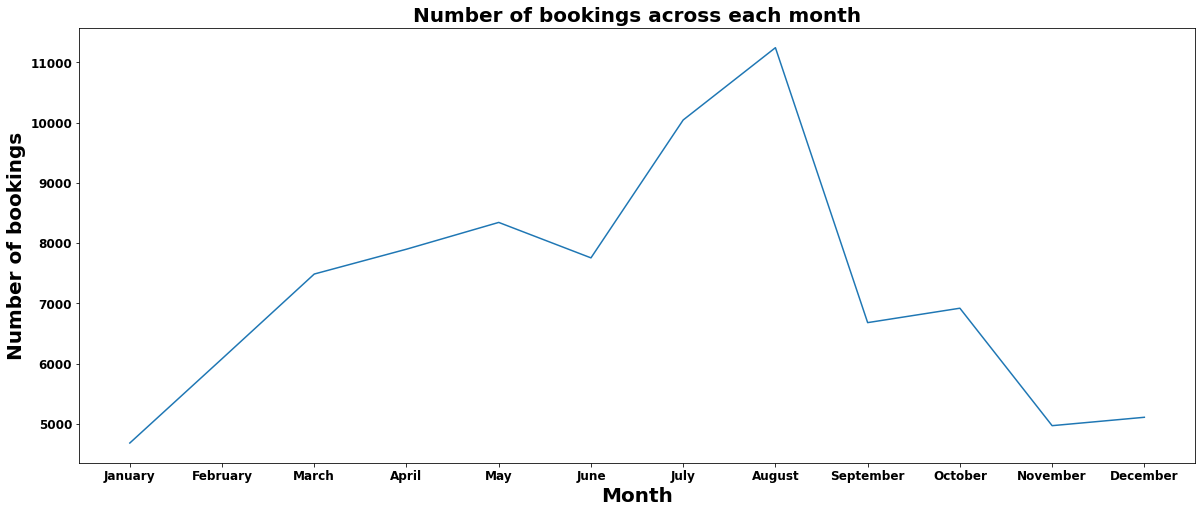

In [62]:

plt.figure(figsize=(20,8))
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])
plt.title('Number of bookings across each month')
plt.xlabel('Month')
plt.ylabel('Number of bookings')

# **Observation**

### July and August months had the most Bookings. Summer vaccation can be the reason for the bookings.

# **Q.13) Which Distribution channel is mostly used for hotel bookings?**


In [63]:
# Visualizsing the by pie chart.

#Creating labels
labels=df1['distribution_channel'].value_counts().index.tolist()
# creating new df of distribution channel
distribution_channel_df=df1['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})
distribution_channel_df

,distribution_channel,count
0,TA/TO,69027
1,Direct,12954
2,Corporate,5062
3,GDS,181
4,Undefined,5


In [64]:
#adding percentage columns to the distribution_channel_df
distribution_channel_df['percentage']=round(distribution_channel_df['count']*100/df1.shape[0],1)


In [65]:
#Creating list of percentage
sizes=distribution_channel_df['percentage'].values.tolist()
sizes

[79.1, 14.9, 5.8, 0.2, 0.0]

Text(0.5, 1.0, ' Mostly Used Distribution Channel for Hotel Bookings ')

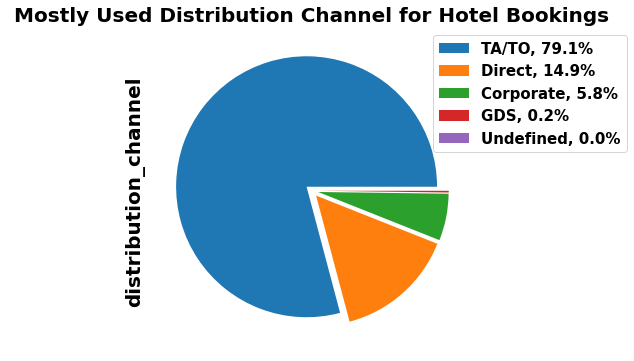

In [66]:

#plotting the piw chart
df1['distribution_channel'].value_counts().plot.pie(explode=[0.05]*5, shadow=False, figsize=(12,6),fontsize=10,labels=None)   

# setting legends with the percentage values
labels = [f'{l}, {s}%' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.title(' Mostly Used Distribution Channel for Hotel Bookings ')


# **Observation:**

### 'TA/TO' is mostly(79.1%) used for booking hotel.

# **14) Which year had the highest bookings?**

Text(0.5, 1.0, 'Year Wise bookings')

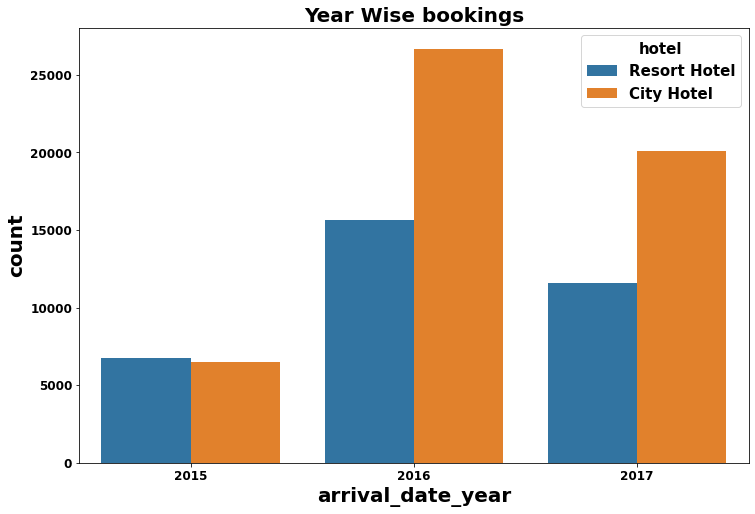

In [67]:

plt.figure(figsize=(12,8))
sns.countplot(x=df1['arrival_date_year'],hue=df1['hotel'])
plt.title("Year Wise bookings")

# **Observation**

### 2016 had the higest bookings.
### 2015 had less 7000 bookings.
### overall City hotels had the most of the bookings.

# **Bivariate and Multivariate Analysis**

In [71]:
# group by hotel
group_by_hotel=df1.groupby('hotel')


# Q.1)Which Hotel Type has the highest ADR?

In [77]:
# grouping by hotel adr
highest_adr=group_by_hotel['adr'].mean().reset_index()
highest_adr


,hotel,adr
0,City Hotel,111.172693
1,Resort Hotel,99.059517


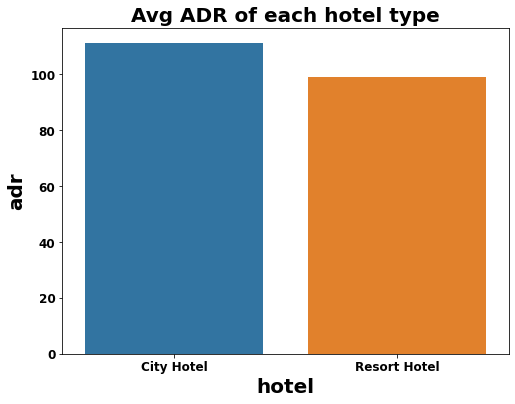

In [80]:
# set plot size
plt.figure(figsize=(8,6))
# set label
plt.xlabel('Hotel Type')
plt.ylabel('ADR')
plt.title('Avg ADR of each hotel type')
# plot the graph
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

# **Observation**

### City hotel has the highest ADR.That means city hotels are genrating more revenue then the hotels. More the ADR more is the revenue

# Q.2) Which Hotel Type has the more lead time?

In [84]:
# group by hotel and taking mean Lead time 
avg_lead_time=group_by_hotel['lead_time'].mean().reset_index()
avg_lead_time

,hotel,lead_time
0,City Hotel,77.794061
1,Resort Hotel,83.387737


Text(0.5, 1.0, 'Average Lead Time for each Hotel type')

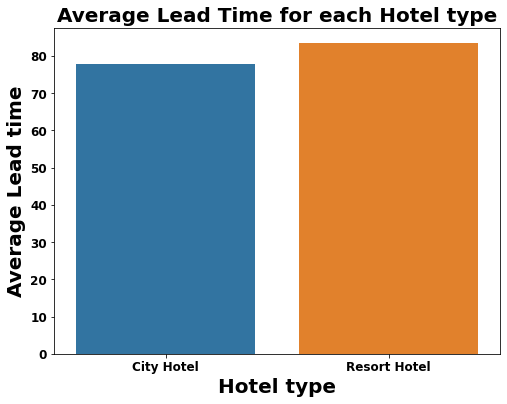

In [86]:
#set plot size
plt.figure(figsize=(8,6))

# plot the bar plot
sns.barplot(x=avg_lead_time['hotel'],y=avg_lead_time['lead_time'])
# set lables
plt.xlabel('Hotel type')
plt.ylabel('Average Lead time')
plt.title("Average Lead Time for each Hotel type")

# **Observation**
### Resort hotels has slightly high avg lead time. That means customers plan their trips very early

# Q.3)Which hotel has highest percentage of booking cancellation?

In [102]:
# booking cancled=1
# booking not canceled=0

# creating new data frame where booking are cancelled.
canceled_df=df1[df1['is_canceled']==1]

# grouping by hotel 
canceled_df=canceled_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})


In [112]:
# adding total booking column for calculating the percentage 
canceled_df['total_booikngs']=df1.groupby('hotel').size().reset_index().rename(columns={0:'total_bookings'}).drop('hotel',axis=1)
canceled_df

,hotel,no_of_cancelled_bookings,total_booikngs
0,City Hotel,16034,53273
1,Resort Hotel,7974,33956


Text(0.5, 1.0, 'Percentage of booking cancellation')

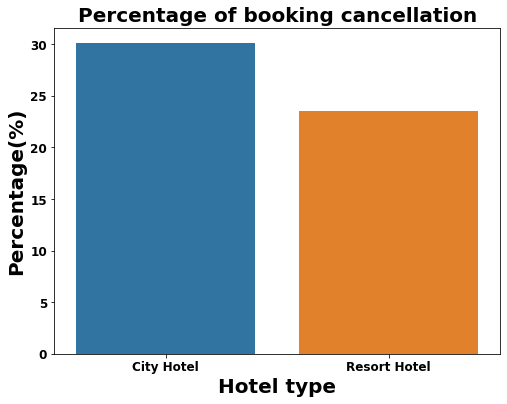

In [116]:
# plotting the barchart
plt.figure(figsize=(8,6))
sns.barplot(x=canceled_df['hotel'],y=canceled_df['no_of_cancelled_bookings']*100/canceled_df['total_booikngs'])
#set labels
plt.xlabel('Hotel type')
plt.ylabel('Percentage(%)')
plt.title("Percentage of booking cancellation")

### City hotel has highest percentage of booking cancellation

# Q.4)  Which hotel has longer waiting time?

In [121]:
# grouping by hotel and taking mean of days in waiting list
waiting_time_df=df1.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
waiting_time_df

,hotel,days_in_waiting_list
0,City Hotel,1.020085
1,Resort Hotel,0.316763


Text(0.5, 1.0, 'waiting time for each hotel type')

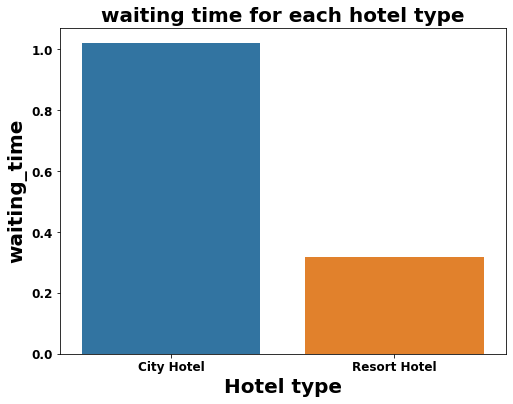

In [124]:
# set the plot size 
plt.figure(figsize=(8,6))
# plot barchart
sns.barplot(x=waiting_time_df['hotel'],y=waiting_time_df['days_in_waiting_list'])
# set labels
plt.xlabel('Hotel type')
plt.ylabel('waiting_time')
plt.title('waiting time for each hotel type')

# **Observation**

So the City Hotel has longer waiting period then the resort Hotels.
Thus we can say City Hotel are much busier than the Resort Hotels 

# Q.5) Which Hotels has the most Repeated guest?

In [130]:
# repeated guest=1
# not repeated guest=0
repeated_guest_df=df1[df1['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'number_of_repeated_guest'})
repeated_guest_df

,hotel,number_of_repeated_guest
0,City Hotel,1657
1,Resort Hotel,1707


Text(0.5, 1.0, 'Most repeated guest for each hotel')

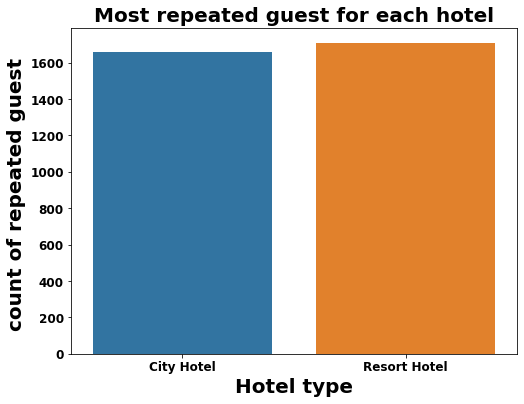

In [131]:
# set the plot size and plot barchart 
plt.figure(figsize=(8,6))
sns.barplot(x=repeated_guest_df['hotel'],y=repeated_guest_df['number_of_repeated_guest'])
plt.xlabel('Hotel type')
plt.ylabel('count of repeated guest ')
plt.title('Most repeated guest for each hotel')


# **# Observation**

# Resort Hotel has slightly more guest than the City Hotels.It is almost similar for both hotels

ADR across the diffrent months

In [134]:
# groupby 
bookings_by_months_df=df1.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()

In [139]:
# create month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)

In [142]:
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df

,arrival_date_month,hotel,adr
8,January,City Hotel,85.269875
9,January,Resort Hotel,49.181693
6,February,City Hotel,89.266427
7,February,Resort Hotel,54.102809
15,March,Resort Hotel,57.590889
14,March,City Hotel,94.096062
0,April,City Hotel,117.314134
1,April,Resort Hotel,79.283805
17,May,Resort Hotel,80.551101
16,May,City Hotel,128.055724


Text(0.5, 1.0, 'ADR across each Month')

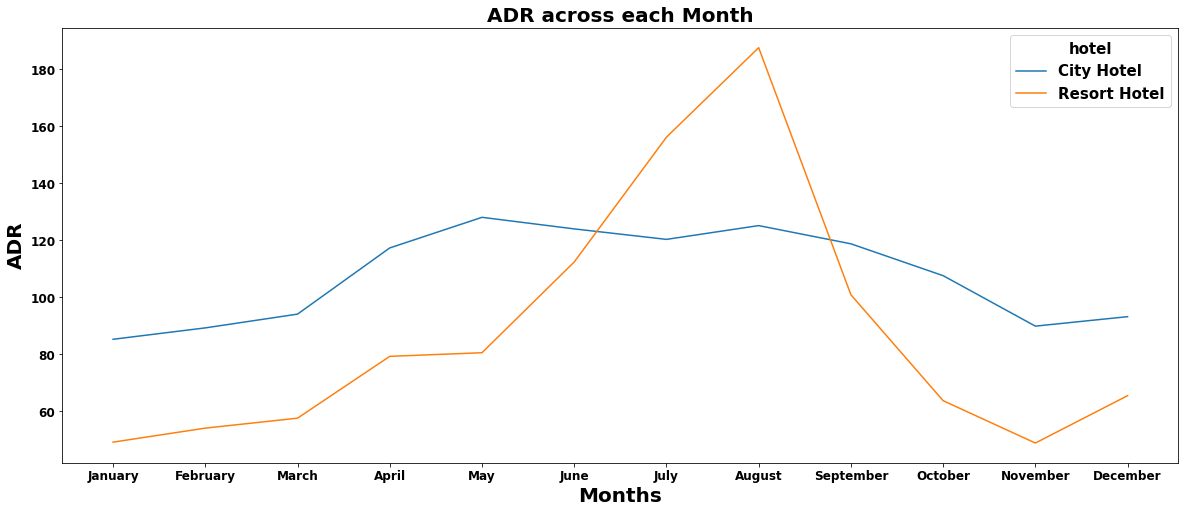

In [145]:
# set the plot size and plot the line
plt.figure(figsize=(20,8))
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['adr'],hue=bookings_by_months_df['hotel'])
plt.xlabel('Months')
plt.ylabel('ADR')
plt.title('ADR across each Month')

# Observation

For Resrot hotel is ADR is high in the months June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the avrage daily rate in this month is very low

# Q.7) Which distribution channel contributed more to adr in order to increase the income?

In [147]:
distribution_channel_df=df1.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()
distribution_channel_df

,distribution_channel,hotel,adr
0,Corporate,City Hotel,83.777368
1,Corporate,Resort Hotel,53.036835
2,Direct,City Hotel,112.606688
3,Direct,Resort Hotel,106.566215
4,GDS,City Hotel,120.317845
5,TA/TO,City Hotel,112.544578
6,TA/TO,Resort Hotel,101.578317
7,Undefined,City Hotel,29.625000
8,Undefined,Resort Hotel,112.700000


Text(0.5, 1.0, 'ADR across Distrubution channel')

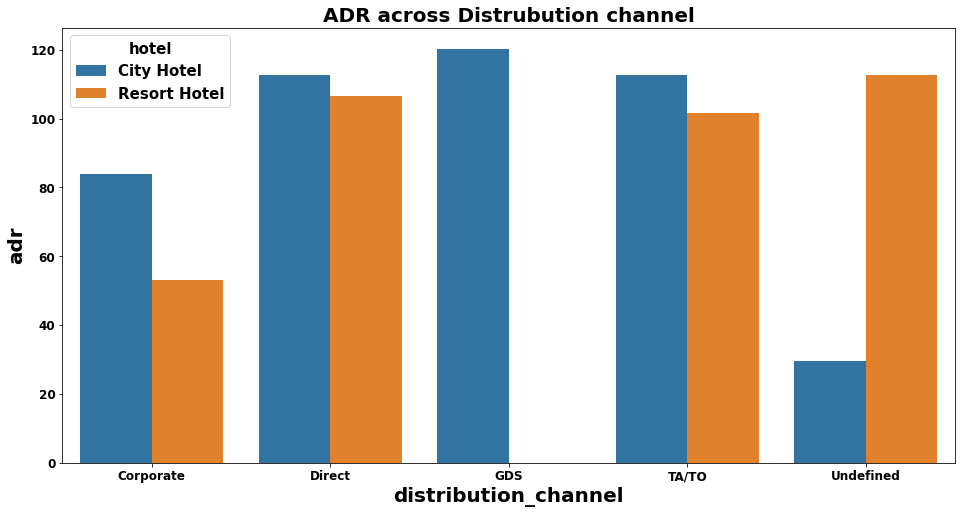

In [155]:
# set plot size and plot barchart 
plt.figure(figsize=(16,8))
sns.barplot(x='distribution_channel',y='adr',data=distribution_channel_df,hue='hotel')
plt.title('ADR across Distrubution channel')

* Corporate- These are corporate hotel booking 
companies which makes bookings
possible.
* GDS-A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.
* Direct- means that bookings are directly made with the respective hotels
* TA/TO- means that booings are made through travel agents or travel operators.
* Undefined- Bookings are undefined. may be customers made their bookings on arrival.



# Observation

**From the plot is clear that**

**'Direct' and 'TA/TO' has almost equally contributed in adr in both type of hotels i.e. 'City Hotel' and 'Resort Hotel'.**

**GDS has highly contributed in adr in 'City Hotel' type.**

**GDS needs to increase Resort Hotel bookings.**

# Q.8)Which distribution channel has the highest cancellation rate?

In [156]:
#1=canceled
canceled_df=df1[df1['is_canceled']==1]
# grouping by distribution channel
canceled_df=canceled_df.groupby(['distribution_channel','hotel']).size().reset_index().rename(columns={0:'counts'})
canceled_df


,distribution_channel,hotel,counts
0,Corporate,City Hotel,330
1,Corporate,Resort Hotel,316
2,Direct,City Hotel,971
3,Direct,Resort Hotel,952
4,GDS,City Hotel,36
5,TA/TO,City Hotel,14693
6,TA/TO,Resort Hotel,6706
7,Undefined,City Hotel,4


Text(0.5, 1.0, 'Cancellation Rate Vs Distribution channel')

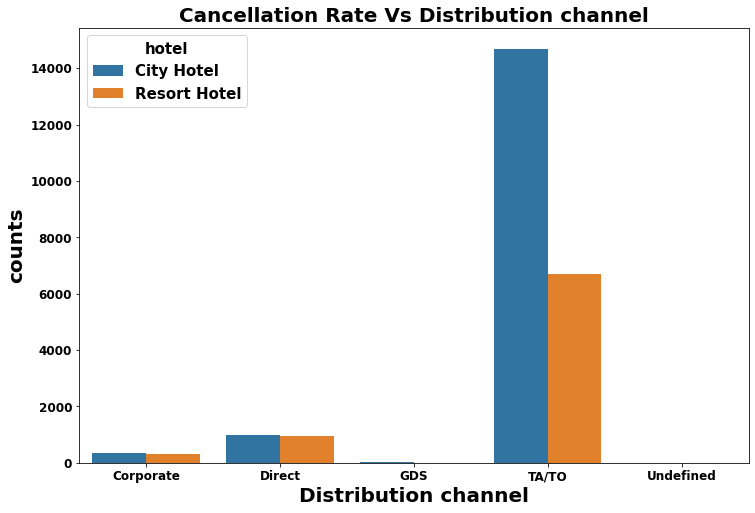

In [157]:
#set plotsize and plot barchart
plt.figure(figsize=(12,8))
sns.barplot(x='distribution_channel',y='counts',hue='hotel',data=canceled_df)
plt.xlabel('Distribution channel')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Distribution channel')

# **Observation**


*  In "TA/TO",city hotels has the high cancellation rate compared to resort
*  In "Direct" both the hotels has almost same cancellation rate



# Q.9)Which Market Segment has the highest Cancellation rate?

In [160]:
market_segment_df=df1[df1['is_canceled']==1]
market_segment_df
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})
market_segment_df

,market_segment,hotel,counts
0,Aviation,City Hotel,45
1,Complementary,City Hotel,54
2,Complementary,Resort Hotel,31
3,Corporate,City Hotel,263
4,Corporate,Resort Hotel,246
5,Direct,City Hotel,912
6,Direct,Resort Hotel,825
7,Groups,City Hotel,887
8,Groups,Resort Hotel,445
9,Offline TA/TO,City Hotel,1256


Text(0.5, 1.0, 'cancellation Rate Vs market_segment')

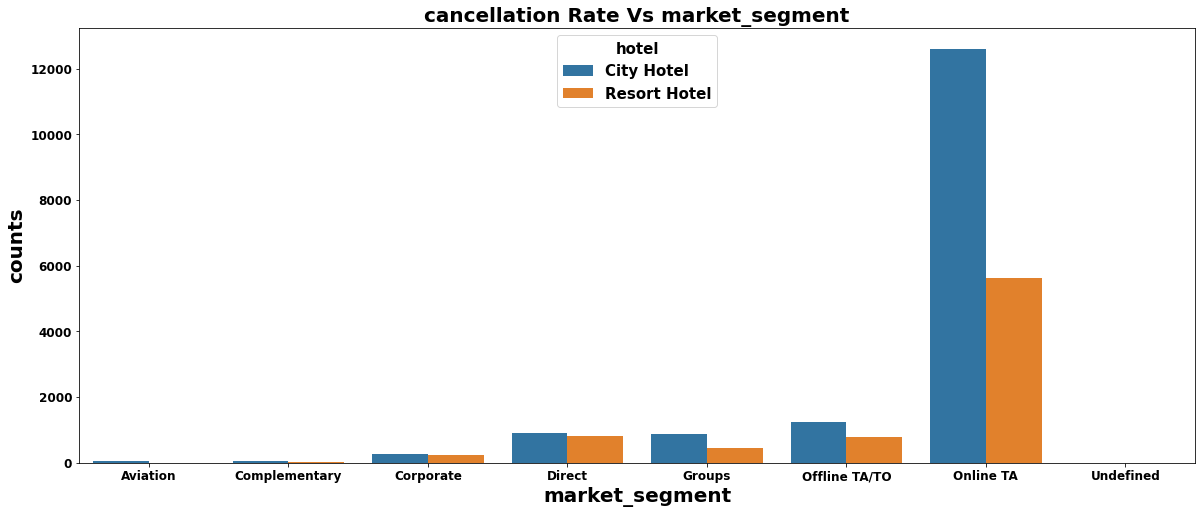

In [163]:
# set plotsize and plot barchart
plt.figure(figsize=(20,8))
sns.barplot(x='market_segment',y='counts',hue='hotel',data=market_segment_df)
plt.xlabel('market_segment')
plt.ylabel('counts')
plt.title('cancellation Rate Vs market_segment')

# **Observation**

# 'Online T/A' has the highest cancellation in both type of cities
In order to reduce the booking cancellations hotels need to set the refundable/ no refundable and deposit policies policies

# Q.10)Does the guest alloted with the same room type which was reserved by them?

In [173]:
# define a function for the reserved room type is same or not as assignmed room type 
def same_room_allotment(x):
  '''function to check whether the reserved room
  type is same or not as assigned room type'''
  if x['reserved_room_type']!=x['assigned_room_type']:
    return 1
  else:
      0

In [175]:
# create new column to df1
df1['Same_room_alloted_or_not']=df1.apply(lambda x: same_room_allotment(x),axis=1)

#groupby is canceled
grp_by_canceled_df=df1.groupby('is_canceled')

# create DF and calculate  percentage of same room alloted  or not
DF=pd.DataFrame(grp_by_canceled_df['Same_room_alloted_or_not'].sum()*100/grp_by_canceled_df.size()).rename(columns={0:"percentage"})
DF

,percentage
is_canceled,
0,19.572610
1,2.565811


([<matplotlib.axis.XTick at 0x7f112fa415d0>,
 [Text(0, 0, 'Not canceled'), Text(0, 0, 'canceled')])

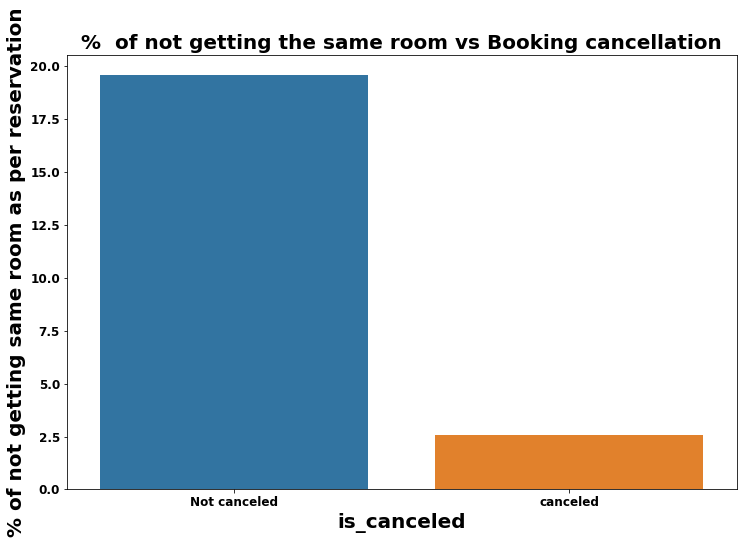

In [183]:
#set plot size and plot barchart
plt.figure(figsize=(12,8))
sns.barplot(x=DF.index,y=DF['percentage'])
# set labels
plt.title('%  of not getting the same room vs Booking cancellation')
plt.xlabel('is_canceled')
plt.ylabel('% of not getting same room as per reservation')
plt.xticks([0,1],['Not canceled','canceled'])


# **Observation**
### Its is clear that there is no much(2.5%) effect on cancellation of the bookings even if the guests are not assigned with rooms which they reserved during booking

# Q.11)ADR across diffrent market segment

Text(0.5, 1.0, 'Adr across market segment')

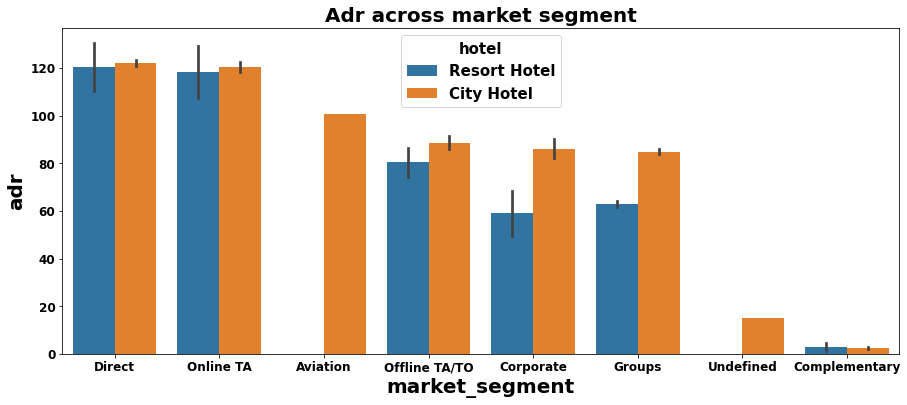

In [189]:
grupby=df1.groupby(['market_segment','hotel','is_canceled'])['adr'].mean().reset_index()
plt.figure(figsize=(15,6))
sns.barplot(x='market_segment',y='adr',hue='hotel',data=grupby.sort_values(by='adr',ascending=False))
plt.title('Adr across market segment')

# **Obseravtion**
### 'Direct' and 'Online TA' are contributing the most in both types of hotels.
### Aviation segment should focus on increasing the bookings of 'City Hotel'

# 12)What is the Optimal stay length in both types of hotels ?

In [195]:
stay=df1.groupby(['total_stay','hotel']).agg('count').reset_index()
stay=stay.iloc[:,:3] #take 1st 3 column
stay=stay.rename(columns={'is_canceled':"number of stays"}) # rename the column

Text(0, 0.5, 'totay_stay(days)')

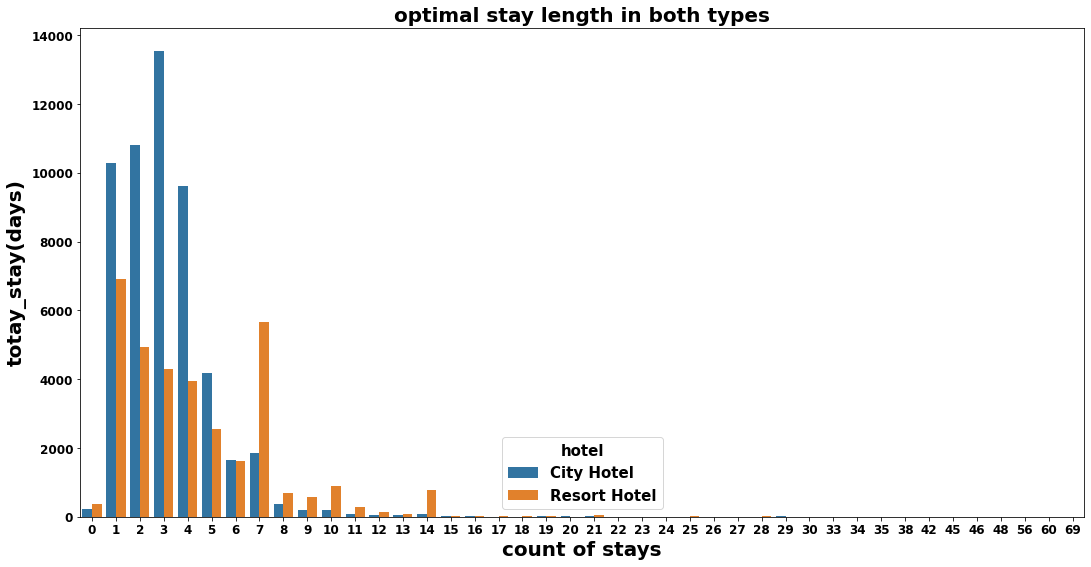

In [196]:
plt.figure(figsize=(18,9))
sns.barplot(x='total_stay',y='number of stays',hue='hotel',data=stay)
plt.title('optimal stay length in both types')
plt.xlabel('count of stays')
plt.ylabel('totay_stay(days)')

# **Observation:**
### Optimal stay in both the type hotel is less than 7 days.

### Q.13)Relationship between ADR and total stay.

In [210]:
# groupby adr,total_stay,hotel
adr_vs_stay =df1.groupby(['total_stay','adr','hotel']).agg('count').reset_index()
adr_vs_stay =adr_vs_stay.iloc[:,:3]
adr_vs_stay =adr_vs_stay.rename(columns={'is_canceled':'Number of stays'})
adr_vs_stay =adr_vs_stay[:18000]
adr_vs_stay

,total_stay,adr,hotel
0,0,0.00,City Hotel
1,0,0.00,Resort Hotel
2,1,0.00,City Hotel
3,1,0.00,Resort Hotel
4,1,1.00,City Hotel
...,...,...,...
17995,7,212.10,Resort Hotel
17996,7,212.14,Resort Hotel
17997,7,212.29,City Hotel
17998,7,212.29,Resort Hotel


Text(0.5, 1.0, 'Relationship between adr and total stay')

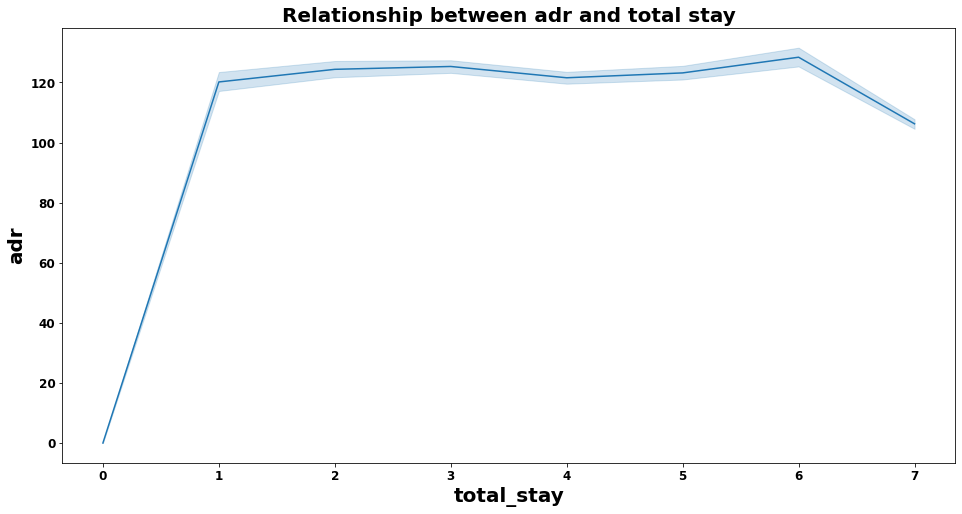

In [212]:
# plot line chart 
plt.figure(figsize=(16,8))
sns.lineplot(x='total_stay',y='adr',data=adr_vs_stay)
plt.title('Relationship between adr and total stay')

As the total stay increase the adr also increases

# Correlation of the columns

Text(0.5, 1.0, 'Co-relation of the columns')

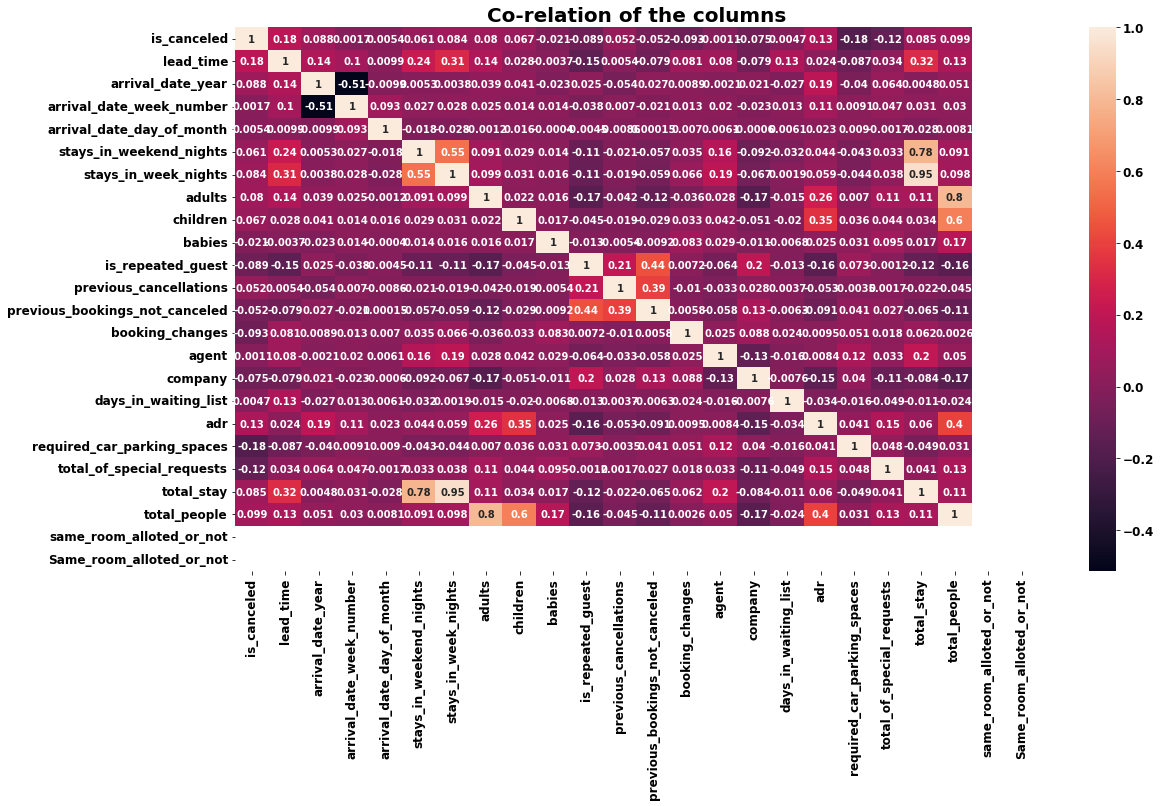

In [213]:
plt.figure(figsize=(18,10))
sns.heatmap(df1.corr(),annot=True)
plt.title('Co-relation of the columns')

**1) is_canceled and same_room_alloted_or_not are negatively corelated. That means customer is unlikely to cancel his bookings if he don't get the same room as per reserved room. We have visualized it above.**

**2) lead_time and total_stay is positively corelated.That means more is the stay of cutsomer more will be the lead time.**

**3)adults,childrens and babies are corelated to each other. That means more the people more will be adr.**

**4) is_repeated guest and previous bookings not canceled has strong corelation. may be repeated guests are not more likely to cancel their bookings.** 

# Relationship between the repeated guests and previous bookings not canceled.?

In [214]:
repeated_guests_df=df1[df1['is_repeated_guest']==1]
repeated_guests_df_1=df1[df1['is_repeated_guest']==0]

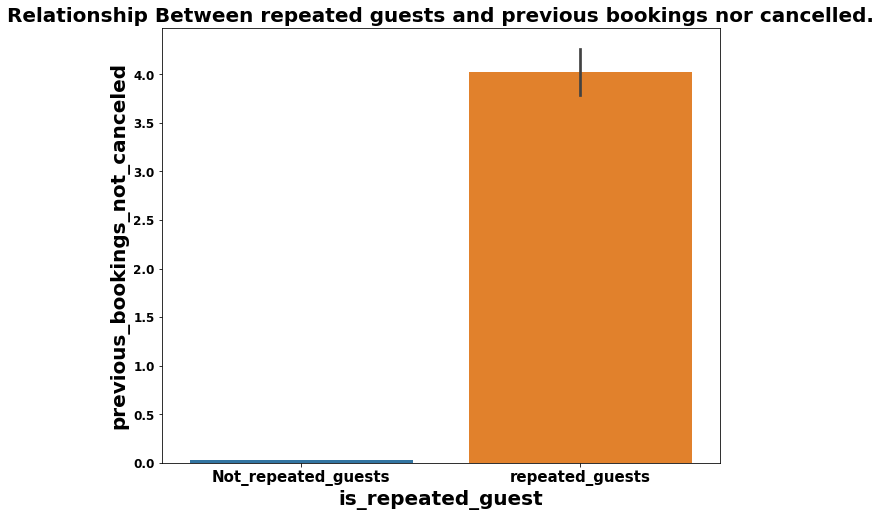

In [217]:
plt.figure(figsize=(10,8))
sns.barplot(x=df1['is_repeated_guest'],y= df1['previous_bookings_not_canceled'])
plt.xticks([0,1],['Not_repeated_guests','repeated_guests'],fontsize=15)
plt.title('Relationship Between repeated guests and previous bookings nor cancelled.')
plt.show()

# **Observation**
### Not Repeated guests are more likely to cancel their bookings

# **Relationship between adr and total stay**

Text(0.5, 1.0, 'Relationship between  adr and total stay')

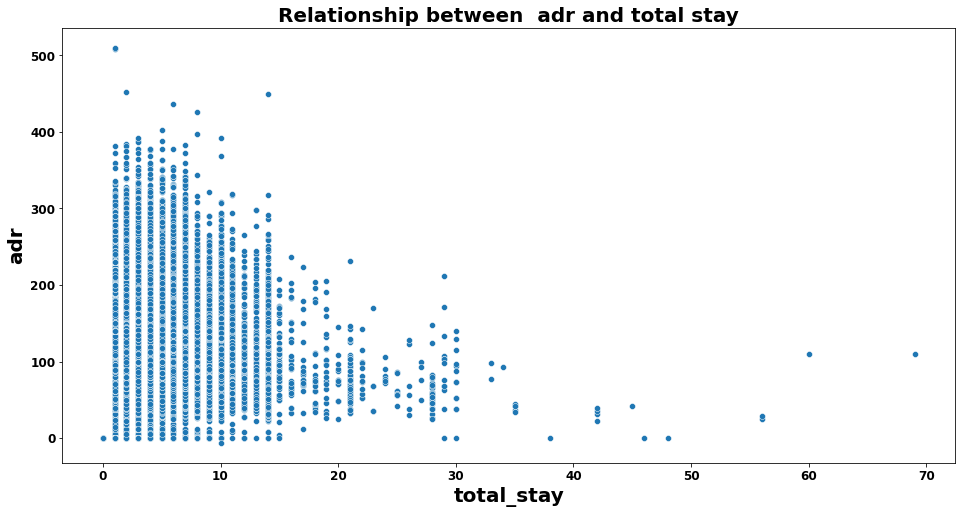

In [218]:
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)
plt.figure(figsize=(16,8))
sns.scatterplot(x=df1['total_stay'],y=df1['adr'])
plt.title('Relationship between  adr and total stay')

### From above scatter we can say that as the stay increases adr is decreasing. Thus for longer stays customer can get good adr.

# ADR relationship with total number of people

Text(0.5, 1.0, 'ADR v/s Total Number of people')

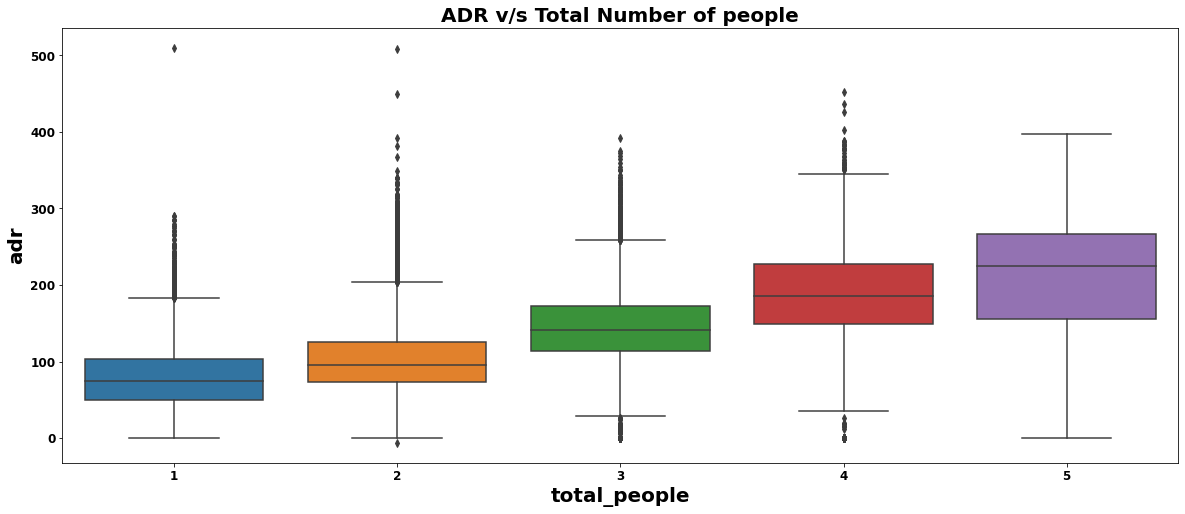

In [219]:
plt.figure(figsize=(20,8))
df2=df1[df1['total_people'] < 6]

sns.boxplot(x=df2['total_people'],y=df2['adr'])

# set lables
plt.title('ADR v/s Total Number of people')

## As the total number of people increases adr also increases.
## Thus adr and total people are directly proportional to each other.

# **Conclusions:**




1. City hotels are the most preferred hotel 
type by the guests. We can say City hotel is the busiest hotel.
2. 27.5 % bookings were got cancelled out of all the bookings.
3. Only 3.9 % people were revisited the hotels. Rest 96.1 % were new guests. Thus retention rate is low.
4. The percentage of 0 changes made in the booking was more than 82 %. Percentage of Single changes made was about 10%.
5. Most of the customers (91.6%) do not require car parking spaces.
6. 79.1 % bookings were made through TA/TO (travel agents/Tour operators).
7. BB( Bed & Breakfast) is the most preferred type of meal by the guests.
8. Maximum number of guests were from Portugal, i.e. more than 25000 guests.
9. Most of the bookings for City hotels and Resort hotel were happened in 2016.
10. Average ADR for city hotel is high as compared to resort hotels. These City hotels are generating more revenue than the resort hotels.
11. Booking cancellation rate is high for City hotels which almost 30 %.
12. Average lead time for resort hotel is high.
13. Waiting time period for City hotel is high as compared to resort hotels. That means city hotels are much busier than Resort hotels.
14. Resort hotels have the most repeated guests.
15. Optimal stay in both the type hotel is less than 7 days. Usually people stay for a week.
16. Almost 19 % people did not cancel their bookings even after not getting the same room which they reserved while booking hotel. Only 2.5 % people cancelled the booking.